In [4]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [20]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/mean_representational_distance/distance_matrix/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/'


In [21]:
mouse_vector = [56165, 32363, 32364, 32365, 411857, 411857, 401714]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,0,2,2,6,2] # total = 6
sessions_overlapping = [1,2,1,0,3,5,0] # total = 6
fixed_corner = [3,4,2,0,1,4,0]
sessions_stable = [2,0,2,0,1,4,1] # total = 5 (4 and 1/2)

In [278]:
random = []
overlapping = []
stable = []

fixed_corner_data = []
occupied_corners_random = []
occupied_corners_stable = []
occupied_corners_overlapping = []
empty_corners_random = []
empty_corners_stable = []
empty_corners_overlapping = []

occupied_corners_overlapping_id = []

for i in range(len(mouse_vector)):
    mouse = mouse_vector[i]
    #### check session_random
    session = sessions_random[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            random.append(distance)
            objects_position_file = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/' + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_random.append(np.load(objects_position_file))
            empty_corners_random.append(np.load(objects_position_file))

    session = sessions_overlapping[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            fixed_corner_data.append(fixed_corner[i])
            overlapping.append(distance)
            objects_position_file = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/' + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_overlapping.append(np.load(objects_position_file))
            empty_corners_overlapping.append(np.load(objects_position_file))
            occupied_corners_overlapping_id.append(np.load(objects_position_file))
            
    session = sessions_stable[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            stable.append(distance)
            objects_position_file = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/' + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_stable.append(np.load(objects_position_file))
            empty_corners_stable.append(np.load(objects_position_file))

all_corners = [1,2,3,4]


for i in range(len(occupied_corners_random)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_random[i][:,trial]))
        empty_corners_random[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_random[i][1,trial] = non_intersection[1] + trial * 4 -1
        occupied_corners_random[i][0,trial] = (occupied_corners_random[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_random[i][1,trial] = (occupied_corners_random[i][1,trial] + trial * 4 -1).astype(int)

        
for i in range(len(occupied_corners_stable)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_stable[i][:,trial]))
        empty_corners_stable[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_stable[i][1,trial] = non_intersection[1] + trial * 4 -1
        occupied_corners_stable[i][0,trial] = (occupied_corners_stable[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_stable[i][1,trial] = (occupied_corners_stable[i][1,trial] + trial * 4 -1).astype(int)

for i in range(len(occupied_corners_overlapping)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_overlapping[i][:,trial]))
        empty_corners_overlapping[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_overlapping[i][1,trial] = non_intersection[1] + trial * 4 -1
        
        occupied_corners_overlapping_id[i][0,trial] = fixed_corner_data[i] + trial *4 -1
        
        if occupied_corners_overlapping[i][0,trial] == fixed_corner_data[i]:
            occupied_corners_overlapping_id[i][1,trial] = (occupied_corners_overlapping[i][1,trial] + trial * 4 -1).astype(int)
        else:
            occupied_corners_overlapping_id[i][1,trial] = (occupied_corners_overlapping[i][0,trial] + trial * 4 -1).astype(int)

        occupied_corners_overlapping[i][0,trial] = (occupied_corners_overlapping[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_overlapping[i][1,trial] = (occupied_corners_overlapping[i][1,trial] + trial * 4 -1).astype(int)

random_1 = []
for i in range(len(random)):
    random_transf = []
    for j in range(6):
        distance_zs = (random[i][j] - np.mean(random[i][j][np.nonzero(random[i][j])]))/np.std(random[i][j][np.nonzero(random[i][j])])
        random_transf.append(distance_zs)
    random_1.append(np.array(random_transf))
    
stable_1 = []       
for i in range(len(stable)):
    stable_transf = []
    for j in range(6):
        distance_zs = (stable[i][j] - np.mean(stable[i][j][np.nonzero(stable[i][j])]))/np.std(stable[i][j][np.nonzero(stable[i][j])])
        stable_transf.append(distance_zs)
    stable_1.append(np.array(stable_transf))
    
overlapping_1 = []
for i in range(len(overlapping)):
    overlapping_transf = []
    for j in range(6):
        distance_zs = (overlapping[i][j] - np.mean(overlapping[i][j][np.nonzero(overlapping[i][j])]))/np.std(overlapping[i][j][np.nonzero(overlapping[i][j])])
        overlapping_transf.append(distance_zs)
    overlapping_1.append(np.array(overlapping_transf))

random = random_1
stable = stable_1
overlapping = overlapping_1

In [279]:

evolution_random = []
evolution_overlapping = []
evolution_stable = []

evolution_random2 = []
evolution_overlapping2 = []
evolution_stable2 = []

evolution_random3 = []
evolution_overlapping3_mov = []
evolution_overlapping3_fix = []
evolution_stable3 = []

for i in range(len(random)):
    evolution_random_ = []
    evolution_random2_ = []
    for j in range(random[0].shape[0]):
        evolution_random_.append(random[i][j,(occupied_corners_random[i][0,:]).astype(int),occupied_corners_random[i][1,:].astype(int)])
        evolution_random2_.append(random[i][j,(empty_corners_random[i][0,:]).astype(int),empty_corners_random[i][1,:].astype(int)])
    evolution_random.append(evolution_random_)
    evolution_random2.append(evolution_random2_)

for j in range(random[0].shape[0]):
    evolution_random3_ = []
    for i in range(len(random)):
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][0,:]).astype(int),empty_corners_random[i][0,:].astype(int)])
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][0,:]).astype(int),empty_corners_random[i][1,:].astype(int)])
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][1,:]).astype(int),empty_corners_random[i][0,:].astype(int)])
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][1,:]).astype(int),empty_corners_random[i][1,:].astype(int)])
    evolution_random3.append(evolution_random3_)
        
for i in range(len(stable)):
    evolution_stable_ = []
    evolution_stable2_ = []
    
    for j in range(stable[0].shape[0]):
        evolution_stable_.append(stable[i][j,(occupied_corners_stable[i][0,:]).astype(int),occupied_corners_stable[i][1,:].astype(int)])
        evolution_stable2_.append(stable[i][j,(empty_corners_stable[i][0,:]).astype(int),empty_corners_stable[i][1,:].astype(int)])
        
    evolution_stable.append(evolution_stable_)
    evolution_stable2.append(evolution_stable2_)

for j in range(stable[0].shape[0]):
    evolution_stable3_ = []
    for i in range(len(stable)):
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][0,:]).astype(int),empty_corners_stable[i][0,:].astype(int)])
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][0,:]).astype(int),empty_corners_stable[i][1,:].astype(int)])
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][1,:]).astype(int),empty_corners_stable[i][0,:].astype(int)])
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][1,:]).astype(int),empty_corners_stable[i][1,:].astype(int)])
    evolution_stable3.append(evolution_stable3_)

for i in range(len(overlapping)):
    evolution_overlapping_ = []
    evolution_overlapping2_ = []
    
    for j in range(overlapping[0].shape[0]):
        evolution_overlapping_.append(overlapping[i][j,(occupied_corners_overlapping[i][0,:]).astype(int),occupied_corners_overlapping[i][1,:].astype(int)])
        evolution_overlapping2_.append(overlapping[i][j,(empty_corners_overlapping[i][0,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])
        
    evolution_overlapping.append(evolution_overlapping_)
    evolution_overlapping2.append(evolution_overlapping2_)
    

for j in range(overlapping[0].shape[0]):
    evolution_overlapping3_mov_ = []    
    evolution_overlapping3_fix_ = []    
    for i in range(len(overlapping)):
        evolution_overlapping3_mov_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
        evolution_overlapping3_mov_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])

        evolution_overlapping3_fix_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
        evolution_overlapping3_fix_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])
    evolution_overlapping3_fix.append(evolution_overlapping3_fix_)
    evolution_overlapping3_mov.append(evolution_overlapping3_mov_)
    


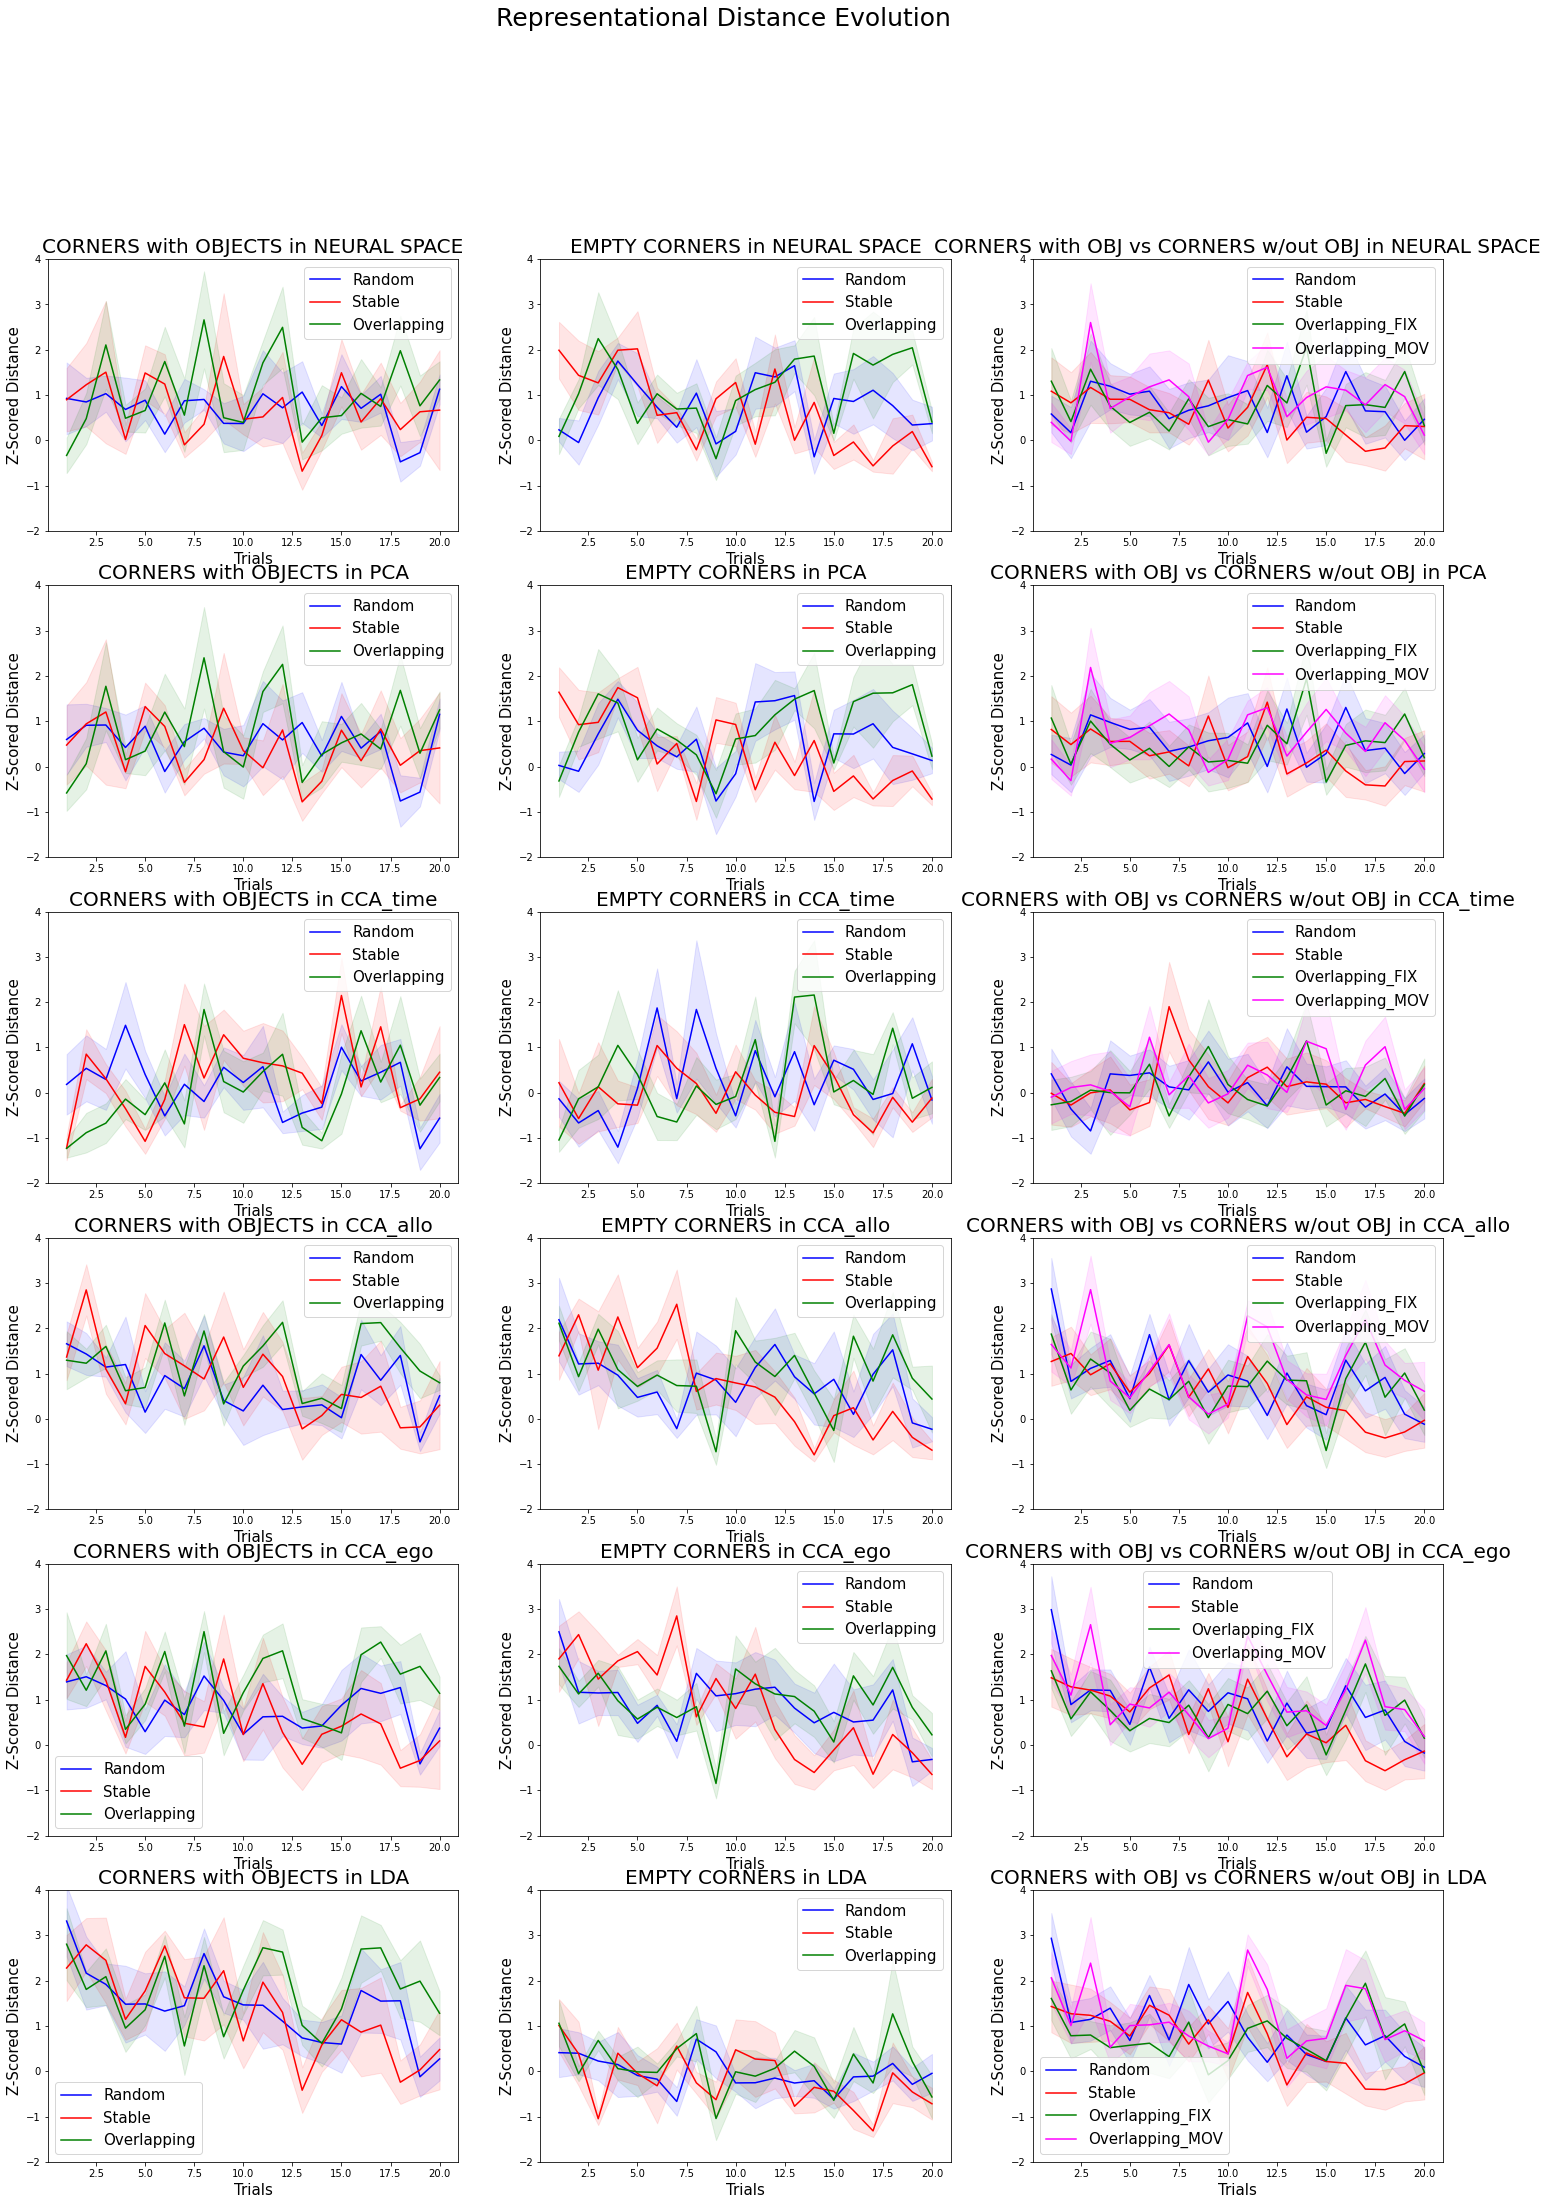

In [283]:
figure, axes = plt.subplots(6,3)
time = np.arange(1,21)

random_mean = np.mean(evolution_random, axis = 0)
random_std =  np.std(evolution_random,axis = 0)/np.sqrt(len(evolution_random))

stable_mean = np.mean(evolution_stable, axis = 0)
stable_std =  np.std(evolution_stable,axis = 0)/np.sqrt(len(evolution_stable))

overlapping_mean = np.mean(evolution_overlapping, axis = 0)
overlapping_std =  np.std(evolution_overlapping,axis = 0)/np.sqrt(len(evolution_overlapping))

random_mean2 = np.mean(evolution_random2, axis = 0)
random_std2 =  np.std(evolution_random2,axis = 0)/np.sqrt(len(evolution_random2))

stable_mean2 = np.mean(evolution_stable2, axis = 0)
stable_std2 =  np.std(evolution_stable2,axis = 0)/np.sqrt(len(evolution_stable2))

overlapping_mean2 = np.mean(evolution_overlapping2, axis = 0)
overlapping_std2 =  np.std(evolution_overlapping2,axis = 0)/np.sqrt(len(evolution_overlapping2))


random_mean3 = np.mean(evolution_random3, axis = 1)
random_std3 =  np.std(evolution_random3,axis = 1)/np.sqrt(len(evolution_random3))

stable_mean3 = np.mean(evolution_stable3, axis = 1)
stable_std3 =  np.std(evolution_stable3,axis = 1)/np.sqrt(len(evolution_stable3))


overlapping_mean3_fix = np.mean(evolution_overlapping3_fix, axis = 1)
overlapping_std3_fix =  np.std(evolution_overlapping3_fix,axis = 1)/np.sqrt(len(evolution_overlapping3_fix))

overlapping_mean3_mov = np.mean(evolution_overlapping3_mov, axis = 1)
overlapping_std3_mov =  np.std(evolution_overlapping3_mov,axis = 1)/np.sqrt(len(evolution_overlapping3_mov))



label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']


for i in range(6):

    axes[i,0].plot(time,random_mean[i],'b')
    axes[i,0].fill_between(time,random_mean[i]-random_std[i],random_mean[i]+random_std[i],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

    axes[i,0].plot(time,stable_mean[i],'r')
    axes[i,0].fill_between(time,stable_mean[i]-stable_std[i],stable_mean[i]+stable_std[i],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

    axes[i,0].plot(time,overlapping_mean[i],'g')
    axes[i,0].fill_between(time,overlapping_mean[i]-overlapping_std[i],overlapping_mean[i]+overlapping_std[i],alpha = 0.1, edgecolor = 'g', facecolor = 'g')

    axes[i,1].plot(time,random_mean2[i],'b')
    axes[i,1].fill_between(time,random_mean2[i]-random_std2[i],random_mean2[i]+random_std2[i],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

    axes[i,1].plot(time,stable_mean2[i],'r')
    axes[i,1].fill_between(time,stable_mean2[i]-stable_std2[i],stable_mean2[i]+stable_std2[i],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

    axes[i,1].plot(time,overlapping_mean2[i],'g')
    axes[i,1].fill_between(time,overlapping_mean2[i]-overlapping_std2[i],overlapping_mean2[i]+overlapping_std2[i],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    
    axes[i,2].plot(time,random_mean3[i],'b')
    axes[i,2].fill_between(time,random_mean3[i]-random_std3[i],random_mean3[i]+random_std3[i],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    
    axes[i,2].plot(time,stable_mean3[i],'r')
    axes[i,2].fill_between(time,stable_mean3[i]-stable_std3[i],stable_mean3[i]+stable_std3[i],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    
    axes[i,2].plot(time,overlapping_mean3_fix[i],'g')
    axes[i,2].fill_between(time,overlapping_mean3_fix[i]-overlapping_std3_fix[i],overlapping_mean3_fix[i]+overlapping_std3_fix[i],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
 
    axes[i,2].plot(time,overlapping_mean3_mov[i],'magenta')
    axes[i,2].fill_between(time,overlapping_mean3_mov[i]-overlapping_std3_mov[i],overlapping_mean3_mov[i]+overlapping_std3_mov[i],alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')
  
    
    axes[i,0].set_title('CORNERS with OBJECTS in ' + label[i],fontsize = 20)
    axes[i,1].set_title('EMPTY CORNERS in ' + label[i], fontsize = 20)
    axes[i,2].set_title('CORNERS with OBJ vs CORNERS w/out OBJ in ' + label[i], fontsize = 20)

    axes[i,0].set_xlabel('Trials', fontsize = 15)
    axes[i,1].set_xlabel('Trials', fontsize = 15)
    axes[i,2].set_xlabel('Trials', fontsize = 15)

    axes[i,0].set_ylim([-2, 4])
    axes[i,1].set_ylim([-2, 4])
    axes[i,2].set_ylim([-2, 4])

    axes[i,0].legend(['Random','Stable','Overlapping'],fontsize = 15)
    axes[i,1].legend(['Random','Stable','Overlapping'], fontsize = 15)
    axes[i,2].legend(['Random','Stable','Overlapping_FIX','Overlapping_MOV'], fontsize = 15)

    axes[i,0].set_ylabel('Z-Scored Distance', fontsize = 15)
    axes[i,1].set_ylabel('Z-Scored Distance', fontsize = 15)
    axes[i,2].set_ylabel('Z-Scored Distance', fontsize = 15)

figure.suptitle('Representational Distance Evolution', fontsize = 25)
    
figure.set_size_inches([25,35])
figure_name = 'representational_distance_evolution.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name)

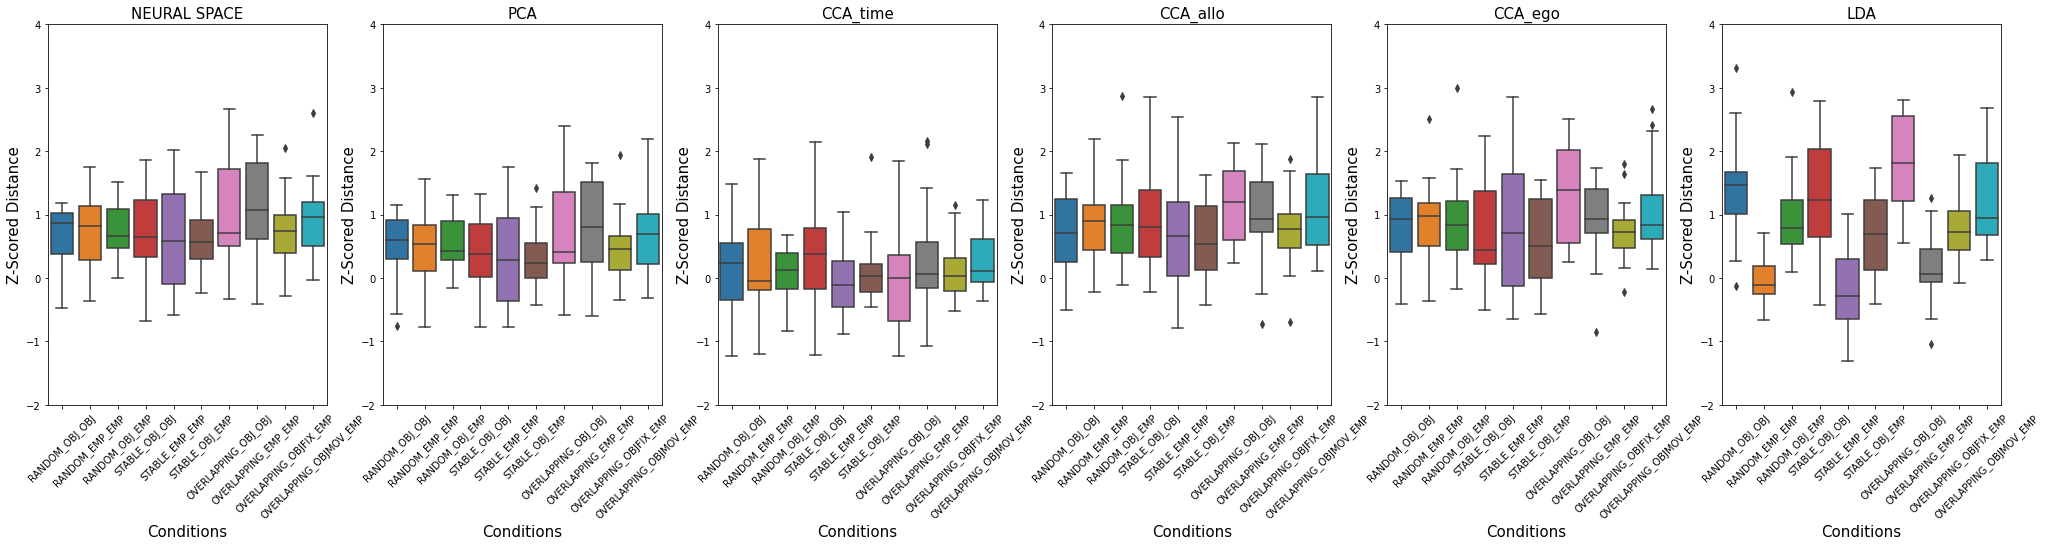

In [284]:
figure = plt.figure()
gs = plt.GridSpec(1,6)

# = ['RANDOM','OVERLAPPING','STABLE','RANDOM_trial','OVERLAPPING_trial','STABLE_trial']
label2 = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP','STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP','OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_OBJFIX_EMP','OVERLAPPING_OBJMOV_EMP']


for i in range(6):
    
    plot_list = [[random_mean[i]],[random_mean2[i]],[random_mean3[i]],[stable_mean[i]],[stable_mean2[i]],[stable_mean3[i]],[overlapping_mean[i]],[overlapping_mean2[i]],[overlapping_mean3_fix[i]],[overlapping_mean3_mov[i]]]
    
    ax1 = figure.add_subplot(gs[0,i])
    
    ax1.set_title(label[i],fontsize = 15)
    ax1.set_xlabel('Conditions', fontsize = 15)
    ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
    ax1 = sns.boxplot(data = plot_list, orient = 'v')
    ax1.set_xticklabels(label2)
    ax1.set_xticklabels(label2)
    ax1.set_ylim([-2,4])
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
figure.set_size_inches([35,7])
figure_name = 'representational_distance_evolution_mean.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name)

In [158]:
random_mean[0].shape

(20,)